In [53]:
import ROOT

# Standard imports
import numpy as np
import os
import matplotlib.pyplot as plt

# Scikit-HEP packages
import boost_histogram as bh
import aghast
import uproot

### Given two root files (one for data, one for simulation) with histograms with same name inside, print the superimposed plots

In [54]:
histos = {}
histos['data'] = []
histos['mc'] = []

data_file = ROOT.TFile('root_files/tnp/tnp_data.root')
mc_file = ROOT.TFile('root_files/tnp/tnp_mc.root')

#### Plot with aghast and boost-histogram

In [55]:
def draw_plot(var, x_lims = None):
    if x_lims:
        x_min = x_lims[0]
        x_max = x_lims[1]
    
    data_histo = data_file.Get(var)
    mc_histo = mc_file.Get(var)
        
    aghast_data_histo = aghast.from_root(data_histo)
    data_data, data_edges = aghast.to_numpy(aghast_data_histo)
    
    aghast_mc_histo = aghast.from_root(mc_histo)
    mc_data, mc_edges = aghast.to_numpy(aghast_mc_histo)
    
    fig, axes = plt.subplots()
    
    boost_data_histo = bh.Histogram(bh.axis.Variable(data_edges[1:-1]))
    boost_data_histo[:] = data_data
    
    boost_mc_histo = bh.Histogram(bh.axis.Variable(mc_edges[1:-1]))
    boost_mc_histo[:] = mc_data
    
    if x_lims:
        axes.set_xlim([x_min, x_max])
    plt.title(var)
    plt.xlabel(var)
    
    plt.bar(boost_data_histo.axes[0].centers, boost_data_histo.view(), width = boost_data_histo.axes[0].widths)
    plt.bar(boost_mc_histo.axes[0].centers, boost_mc_histo.view(), width = boost_mc_histo.axes[0].widths)

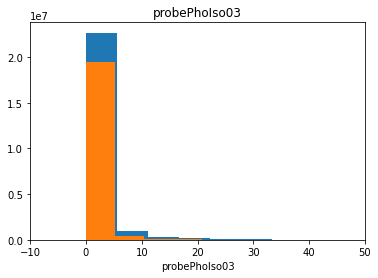

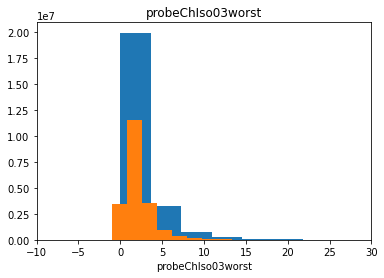

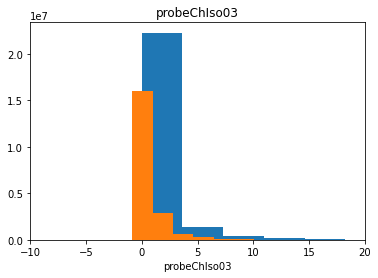

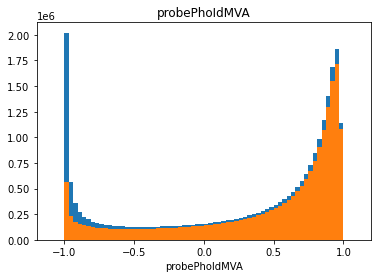

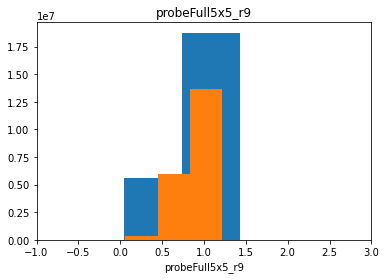

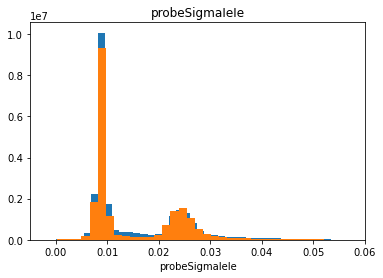

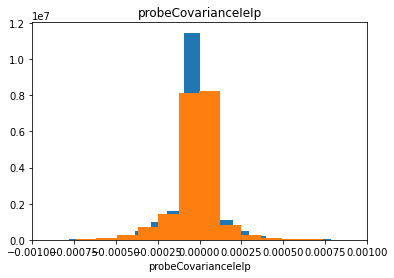

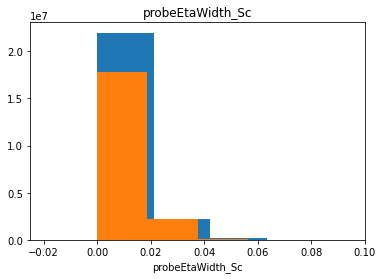

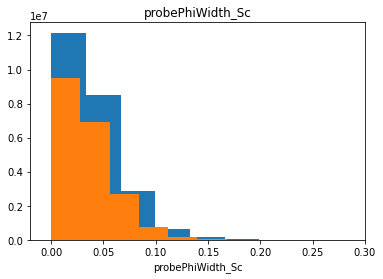

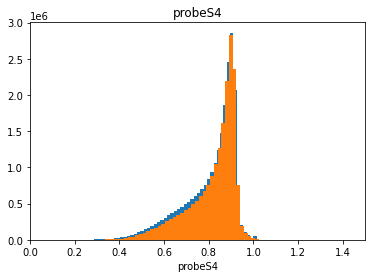

In [56]:
var_lims = {
    'probePhoIso03': [-10, 50],
    'probeChIso03worst': [-10, 30],
    'probeChIso03': [-10, 20],
    'probePhoIdMVA': [-1.2, 1.2],
    'probeFull5x5_r9': [-1, 3],
    'probeSigmaIeIe': [-0.005, 0.06],
    'probeCovarianceIeIp': [-0.001, 0.001],
    'probeEtaWidth_Sc': [-0.025, 0.1],
    'probePhiWidth_Sc': [-0.02, 0.3],
    'probeS4': [0, 1.5]
           }

for v, lims in var_lims.items():
    draw_plot(v, lims)